In [1]:
# SubWiki has data available to export, specifically: Regulations, Operons, Interaction, Categories, Gene cetegories, Genes. Analysis will start with Regulations.
import csv
import networkx as nx
from matplotlib import pylab as pl

G = nx.DiGraph()
# This data is in excel sheets, 
with open("SubtiWiki/regulations-2024-05-13.csv", newline = '') as csvfile:
    excel_regulator = list(csv.reader(csvfile))
    
for index in range(1,len(excel_regulator)):
    species_1 = excel_regulator[index][1]
    species_act = excel_regulator[index][2]
    species_2 = excel_regulator[index][4]
    
    current_nodes = list(G.nodes)
    if species_1 not in current_nodes:
        G.add_node(species_1)
    if species_2 not in current_nodes:
        G.add_node(species_2)
        
    G.add_edge(species_1, species_2, regulation = species_act)
    
#     spamreader = csv.reader(csvfile, delimiter = ' ', quotechar = '|')
#     for row in spamreader:
#         data_row = ', '.join(row)
#         #print(row[0])

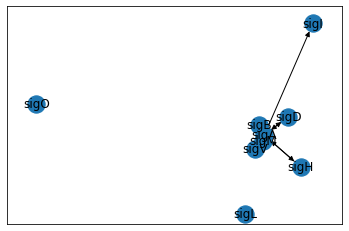

In [4]:
pl.figure()
pos = nx.spring_layout(G)
sigB_subgraph = G.subgraph(["sigA", "sigB", "sigD", "sigH", "sigI", "sigL", "sigM", "sigO", "sigV", "sigZ"])
nx.draw_networkx(sigB_subgraph, pos = pos)
pl.show()

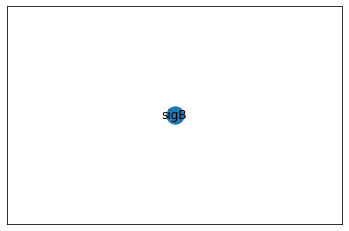

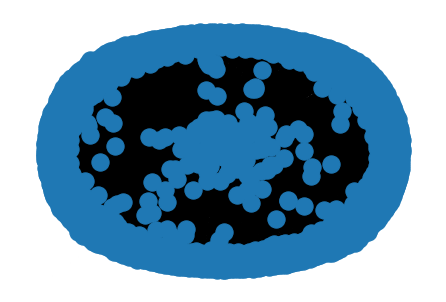

In [3]:
from matplotlib import pylab as pl

pl.figure()
pos = nx.spring_layout(G)
sigB_subgraph = G.subgraph("sigB")
nx.draw_networkx(sigB_subgraph, pos = pos)
pl.show()

pl.figure()
nx.draw(G)
pl.show()

In [15]:
sig_list = list(G.edges("sigA"))
sig_list[0][1][0:3]

'rib'

In [43]:
sig_list = list(G.edges("sigA"))
for current_edge in sig_list:
    if current_edge[1][0:3] == 'sig':
        print(current_edge)

('sigA', 'sigB')
('sigA', 'sigD')
('sigA', 'sigE')
('sigA', 'sigG')
('sigA', 'sigA')
('sigA', 'sigM')
('sigA', 'sigH')
('sigA', 'sigX')
('sigA', 'sigI')


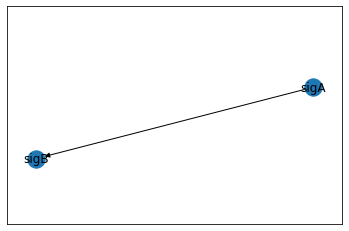

In [46]:
pl.figure()
pos = nx.spring_layout(G)
sigB_subgraph = G.subgraph(["sigA", "sigB"])
nx.draw_networkx(sigB_subgraph, pos = pos)
pl.show()

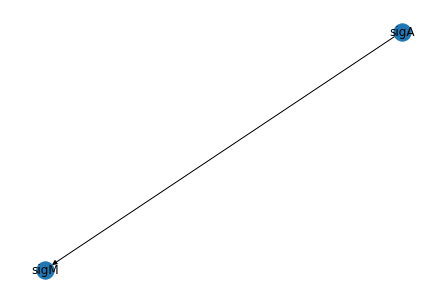

In [97]:
list_of_nodes = []
for current_path in list(nx.all_simple_paths(G, "sigA", "sigM")):
    for current_node in current_path:
        if current_node not in list_of_nodes:
            list_of_nodes.append(current_node)
            
pl.figure()
sigB_subgraph = G.subgraph(list_of_nodes)
nx.draw_spring(sigB_subgraph, with_labels = True)
pl.show()

In [95]:
list(nx.all_simple_paths(G, "sigD", "sigB"))

[['sigD', 'sigA', 'sigB'], ['sigD', 'sigA', 'ccpA', 'sigB']]